In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 读取数据，判断缺省值情况
df = pd.read_csv('./OnlineNewsPopularity/OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [7]:
df_words = df.loc[:, [' n_tokens_title', ' n_tokens_content', ' average_token_length', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens']]
df_links = df.loc[:, [' num_hrefs', ' num_self_hrefs', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess']]
df_media = df.loc[:, [' num_imgs', ' num_videos']]
df_time = df.loc[:,[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend']]
df_keywords = df.loc[:,[' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',' data_channel_is_lifestyle',' data_channel_is_entertainment', ' data_channel_is_bus',' data_channel_is_socmed', ' data_channel_is_tech',' data_channel_is_world']]
df_nlp = df.loc[:,[' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' title_sentiment_polarity', ' abs_title_sentiment_polarity', ' title_subjectivity', ' abs_title_subjectivity']]

In [8]:
print(len(df_words.columns))
print(len(df_links.columns))
print(len(df_media.columns))
print(len(df_time.columns))
print(len(df_keywords.columns))
print(len(df_nlp.columns)) 

6
5
2
8
16
21


Text(0, 0.5, 'values of shares')

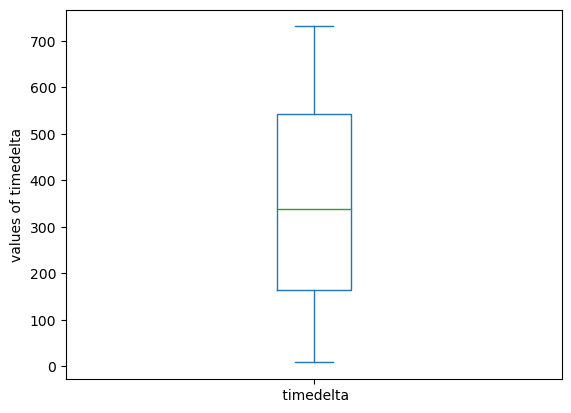

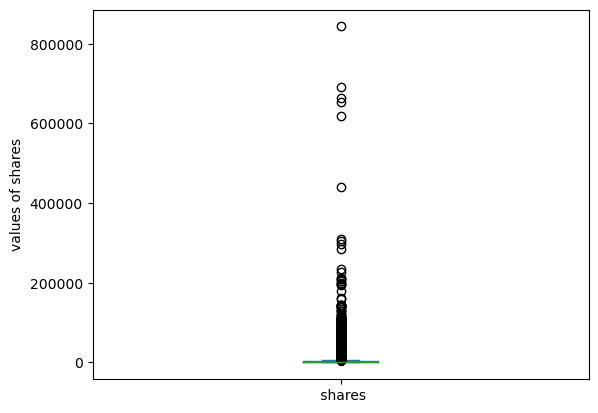

In [9]:
# timedelta, shares, 
fig1,axes1 = plt.subplots()
df[' timedelta'].plot(kind='box',ax=axes1)
fig2,axes2 = plt.subplots()
df[' shares'].plot(kind='box',ax=axes2)
axes1.set_ylabel('values of timedelta')
axes2.set_ylabel('values of shares')

ValueError: The number of passed axes must be 6, the same as the output plot

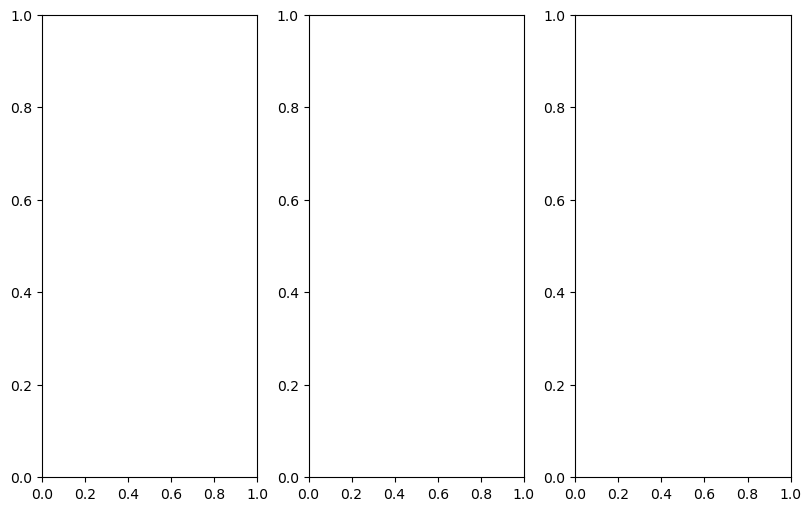

In [21]:
fig,axes = plt.subplots(1,3, constrained_layout = True, figsize=(8,5))
# color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Red')
# boxes表示箱体，whisker表示触须线
# medians表示中位数，caps表示最大与最小值界限

df_words.plot(kind='box',ax=axes, subplots=True, title='Different boxplots', color=color, sym='r+')
 
#fig.subplots_adjust(wspace=1,hspace=1)  # 调整子图之间的间距
fig.tight_layout()
plt.show()

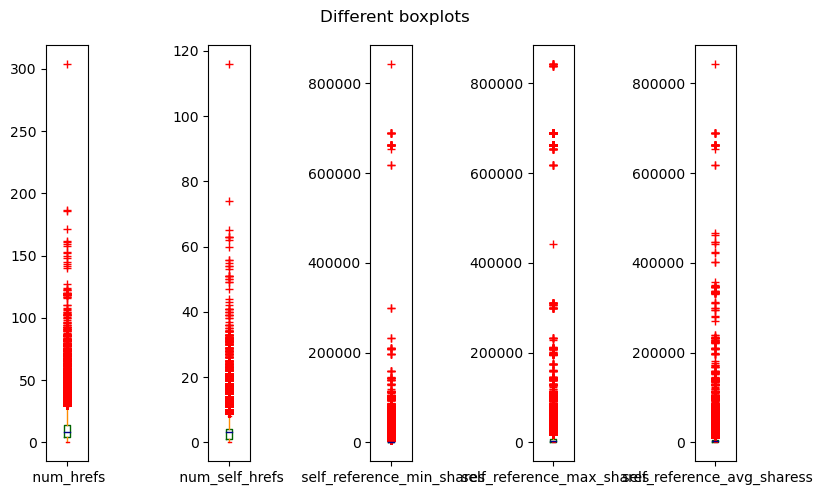

In [22]:
fig,axes = plt.subplots(1,5, constrained_layout = True, figsize=(8,5))

df_links.plot(kind='box', ax=axes,subplots=True,
                              title='Different boxplots',color=color,sym='r+')

fig.tight_layout()
plt.show()

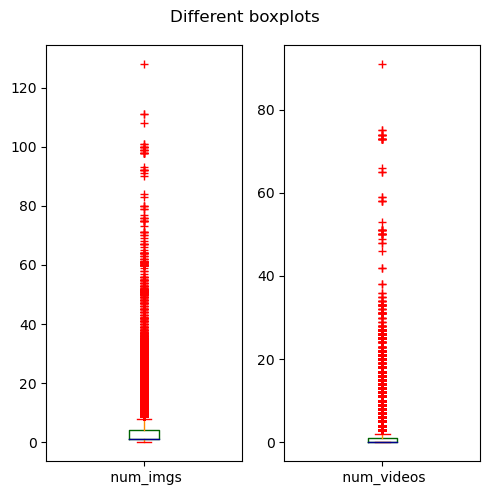

In [23]:
fig,axes = plt.subplots(1,2, constrained_layout = True, figsize=(5,5))
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Red')
df_media.plot(kind='box', ax=axes,subplots=True,
                              title='Different boxplots',color=color,sym='r+')

fig.tight_layout()
plt.show()

ValueError: The number of passed axes must be 16, the same as the output plot

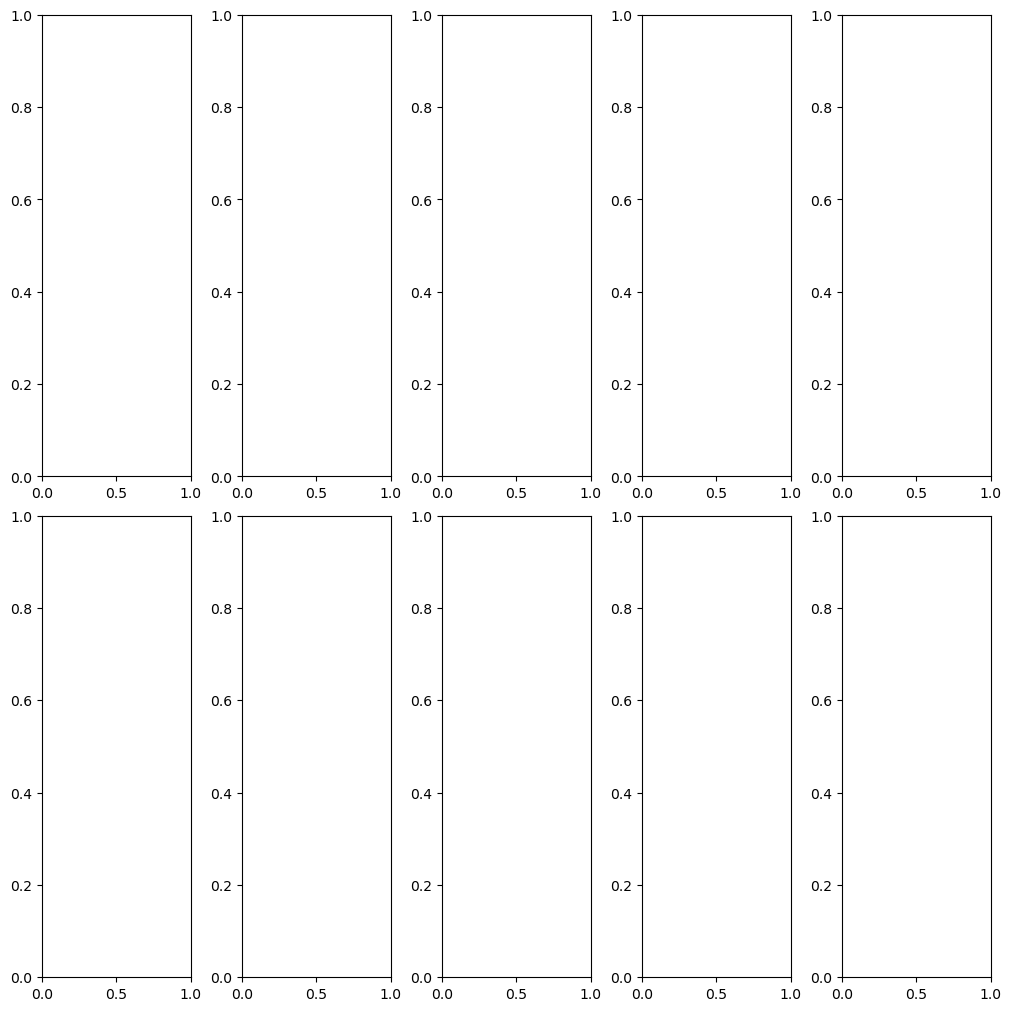

In [24]:
fig,axes = plt.subplots(2,5, constrained_layout = True, figsize=(10,10))

df_keywords.plot(kind='box', ax=axes,subplots=True,
                              title='Different boxplots',color=color,sym='r+')

fig.tight_layout()
plt.show()

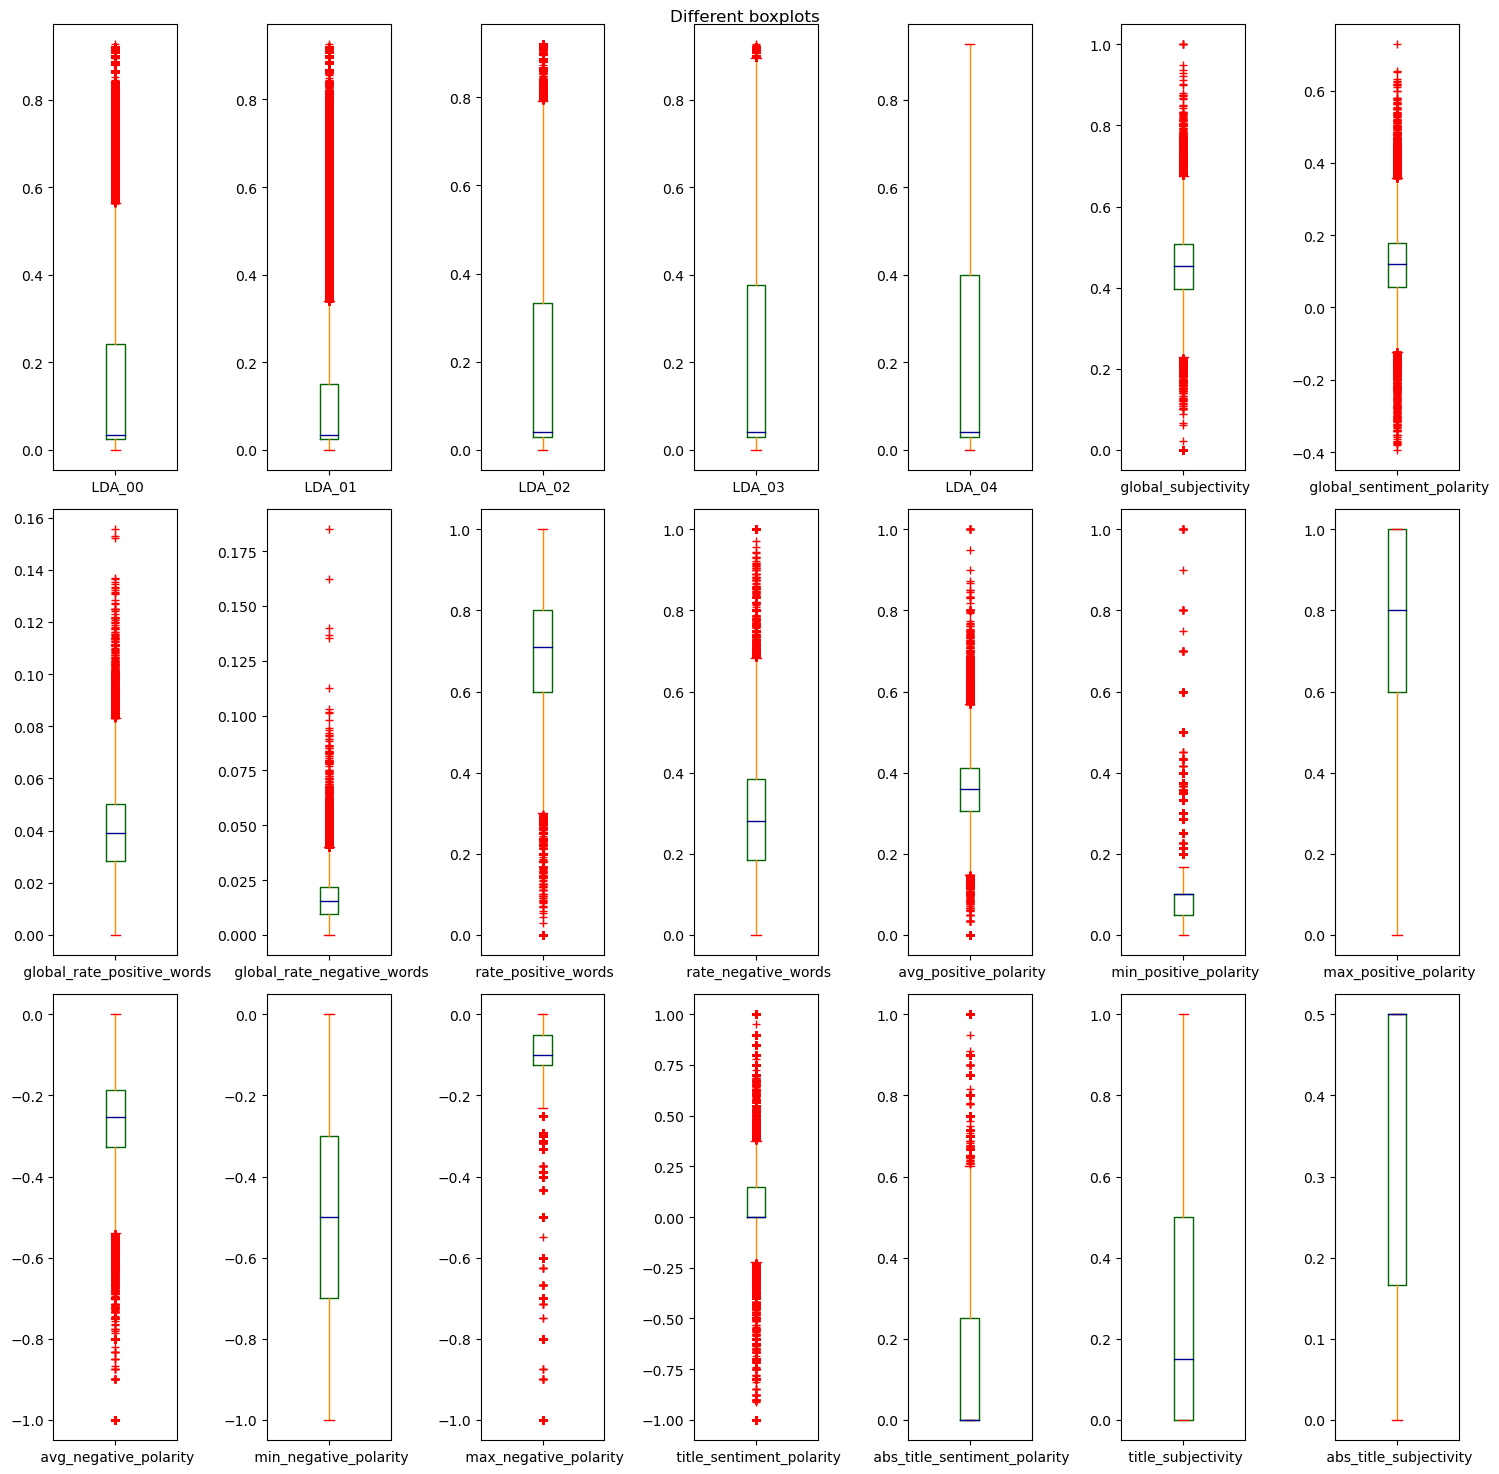

In [25]:
fig,axes = plt.subplots(3,7, constrained_layout = True, figsize=(15,15))

dict = df_nlp.plot(kind='box', ax=axes,subplots=True,
                              title='Different boxplots',color=color,sym='r+')

fig.tight_layout()
plt.show()

In [26]:
col_null = df_words.isnull().sum(axis=0)
print(col_null)

 n_tokens_title              0
 n_tokens_content            0
 average_token_length        0
 n_unique_tokens             0
 n_non_stop_words            0
 n_non_stop_unique_tokens    0
dtype: int64


In [27]:
col_null = df_links.isnull().sum(axis=0)
print(col_null)

 num_hrefs                     0
 num_self_hrefs                0
 self_reference_min_shares     0
 self_reference_max_shares     0
 self_reference_avg_sharess    0
dtype: int64


In [28]:
col_null = df_media.isnull().sum(axis=0)
print(col_null)

 num_imgs      0
 num_videos    0
dtype: int64


In [29]:
col_null = df_keywords.isnull().sum(axis=0)
print(col_null)

 num_keywords                     0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
dtype: int64


In [30]:
col_null = df_time.isnull().sum(axis=0)
print(col_null)

 weekday_is_monday       0
 weekday_is_tuesday      0
 weekday_is_wednesday    0
 weekday_is_thursday     0
 weekday_is_friday       0
 weekday_is_saturday     0
 weekday_is_sunday       0
 is_weekend              0
dtype: int64


In [31]:
col_null = df_nlp.isnull().sum(axis=0)
print(col_null)

 LDA_00                          0
 LDA_01                          0
 LDA_02                          0
 LDA_03                          0
 LDA_04                          0
 global_subjectivity             0
 global_sentiment_polarity       0
 global_rate_positive_words      0
 global_rate_negative_words      0
 rate_positive_words             0
 rate_negative_words             0
 avg_positive_polarity           0
 min_positive_polarity           0
 max_positive_polarity           0
 avg_negative_polarity           0
 min_negative_polarity           0
 max_negative_polarity           0
 title_sentiment_polarity        0
 abs_title_sentiment_polarity    0
 title_subjectivity              0
 abs_title_subjectivity          0
dtype: int64


In [32]:
mean_low = df_words.quantile(q=0.25)
mean_up = df_words.quantile(q=0.75)
mean_delta = mean_up - mean_low
top = (mean_up + 1.5*mean_delta).to_numpy
bottom = (mean_low - 1.5*mean_delta).to_numpy
print(top)

<bound method IndexOpsMixin.to_numpy of  n_tokens_title                16.500000
 n_tokens_content            1421.000000
 average_token_length           5.419491
 n_unique_tokens                0.815433
 n_non_stop_words               1.000000
 n_non_stop_unique_tokens       0.947965
dtype: float64>


In [33]:
for colname in df_words:
    arr = df_words.loc[:,colname].values
    mean = np.percentile(arr, [25, 75])
    mean_delta = mean[1] - mean[0]
    top = mean[1] + 1.5 * mean_delta
    bottom = mean[0] - 1.5 * mean_delta
    fliers_cnt = np.sum(arr > top) + np.sum(arr < bottom)
    print(colname + ": " + str(fliers_cnt) + ", per = " + str(fliers_cnt / arr.size * 100) + "%")

 n_tokens_title: 156, per = 0.3935021693068308%
 n_tokens_content: 1933, per = 4.875895469680153%
 average_token_length: 1681, per = 4.240238119261427%
 n_unique_tokens: 1604, per = 4.04600948441126%
 n_non_stop_words: 2827, per = 7.130965593784684%
 n_non_stop_unique_tokens: 1733, per = 4.37140550903037%


In [34]:
for colname in df_links:
    arr = df_links.loc[:,colname].values
    mean = np.percentile(arr, [25, 75])
    mean_delta = mean[1] - mean[0]
    top = mean[1] + 1.5 * mean_delta
    bottom = mean[0] - 1.5 * mean_delta
    fliers_cnt = np.sum(arr > top) + np.sum(arr < bottom)
    print(colname + ": " + str(fliers_cnt) + ", per = " + str(fliers_cnt / arr.size * 100) + "%")

 num_hrefs: 2169, per = 5.471193623246898%
 num_self_hrefs: 2090, per = 5.271920088790233%
 self_reference_min_shares: 4976, per = 12.551710220966603%
 self_reference_max_shares: 4183, per = 10.551407526990213%
 self_reference_avg_sharess: 4209, per = 10.616991221874684%


In [35]:
for colname in df_time:
    arr = df_time.loc[:,colname].values
    print(colname + ": " + str(np.sum(arr)))

 weekday_is_monday: 6661.0
 weekday_is_tuesday: 7390.0
 weekday_is_wednesday: 7435.0
 weekday_is_thursday: 7267.0
 weekday_is_friday: 5701.0
 weekday_is_saturday: 2453.0
 weekday_is_sunday: 2737.0
 is_weekend: 5190.0


In [36]:
for colname in df_media:
    arr = df_media.loc[:,colname].values
    mean = np.percentile(arr, [25, 75])
    mean_delta = mean[1] - mean[0]
    top = mean[1] + 1.5 * mean_delta
    bottom = mean[0] - 1.5 * mean_delta
    fliers_cnt = np.sum(arr > top) + np.sum(arr < bottom)
    print(colname + ": " + str(fliers_cnt) + ", per = " + str(fliers_cnt / arr.size * 100) + "%")

 num_imgs: 7703, per = 19.430430834426396%
 num_videos: 2946, per = 7.431137120371305%


In [37]:
for colname in df_keywords:
    arr = df_keywords.loc[:,colname].values
    mean = np.percentile(arr, [25, 75])
    mean_delta = mean[1] - mean[0]
    top = mean[1] + 1.5 * mean_delta
    bottom = mean[0] - 1.5 * mean_delta
    fliers_cnt = np.sum(arr > top) + np.sum(arr < bottom)
    print(colname + ": " + str(fliers_cnt) + ", per = " + str(fliers_cnt / arr.size * 100) + "%")

 num_keywords: 51, per = 0.1286449399656947%
 kw_min_min: 4677, per = 11.797497729795177%
 kw_max_min: 3661, per = 9.234688729694279%
 kw_avg_min: 2081, per = 5.249218040560993%
 kw_min_max: 5063, per = 12.771163353849257%
 kw_max_max: 9440, per = 23.811926142669762%
 kw_avg_max: 960, per = 2.4215518111189587%
 kw_min_avg: 0, per = 0.0%
 kw_max_avg: 2391, per = 6.031177479568157%
 kw_avg_avg: 1629, per = 4.109070729492483%
 data_channel_is_lifestyle: 2099, per = 5.2946221370194735%
 data_channel_is_entertainment: 7057, per = 17.800928261527595%
 data_channel_is_bus: 6258, per = 15.785490868731713%
 data_channel_is_socmed: 2323, per = 5.85965089294723%
 data_channel_is_tech: 7346, per = 18.52991625466653%
 data_channel_is_world: 8427, per = 21.256684491978607%


In [38]:
for colname in df_nlp:
    arr = df_nlp.loc[:,colname].values
    mean = np.percentile(arr, [25, 75])
    mean_delta = mean[1] - mean[0]
    top = mean[1] + 1.5 * mean_delta
    bottom = mean[0] - 1.5 * mean_delta
    fliers_cnt = np.sum(arr > top) + np.sum(arr < bottom)
    print(colname + ": " + str(fliers_cnt) + ", per = " + str(fliers_cnt / arr.size * 100) + "%")

 LDA_00: 5282, per = 13.32357986076077%
 LDA_01: 5834, per = 14.715972152154173%
 LDA_02: 3541, per = 8.931994753304409%
 LDA_03: 1075, per = 2.711633538492584%
 LDA_04: 0, per = 0.0%
 global_subjectivity: 1912, per = 4.822924023811926%
 global_sentiment_polarity: 825, per = 2.081021087680355%
 global_rate_positive_words: 497, per = 1.2536575522147109%
 global_rate_negative_words: 1324, per = 3.339723539501564%
 rate_positive_words: 1594, per = 4.0207849863787715%
 rate_negative_words: 494, per = 1.246090202804964%
 avg_positive_polarity: 2095, per = 5.2845323378064775%
 min_positive_polarity: 3147, per = 7.9381495308243375%
 max_positive_polarity: 0, per = 0.0%
 avg_negative_polarity: 865, per = 2.181919079810312%
 min_negative_polarity: 0, per = 0.0%
 max_negative_polarity: 2454, per = 6.1900918171728385%
 title_sentiment_polarity: 7592, per = 19.150438906265766%
 abs_title_sentiment_polarity: 1655, per = 4.174654424376955%
 title_subjectivity: 0, per = 0.0%
 abs_title_subjectivity: 

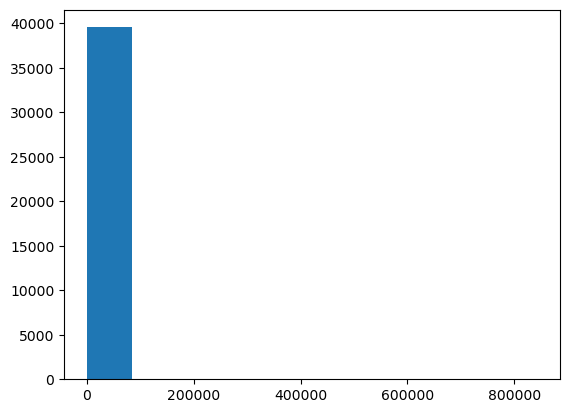

unpopular news count:18490, per = 46.64009686207245%
popular news count:21154, per = 53.35990313792755%


In [39]:
arr = df.loc[:," shares"].values
plt.figure(1)
plt.hist(arr)
plt.show()

print("unpopular news count:" + str(np.sum(arr < 1400)) + ", per = " + str(np.sum(arr < 1400) / arr.size * 100) + "%")
print("popular news count:" + str(np.sum(arr >= 1400)) + ", per = " + str(np.sum(arr >= 1400) / arr.size * 100) + "%")